# Question 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
# SYB64_246_202110_Population Growth, Fertility and Mortality Indicators
dataset = pd.read_csv("http://data.un.org/_Docs/SYB/CSV/SYB64_246_202110_Population%20Growth,%20Fertility%20and%20Mortality%20Indicators.csv", encoding = 'ISO-8859-1', skiprows=1)



In [3]:
dataset.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",41.0,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",248,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),68.9,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


In [4]:
dataset.columns = ['Region_class', 'Region/Country/Area', 'Year', 'Series', 'Value', 'Footnotes', 'Source']

In [5]:
dataset.head()

,Region_class,Region/Country/Area,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",41.0,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",248,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),68.9,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


In [6]:
dataset.shape

(4899, 7)

# Question 2

In [7]:
list_Region_class = list(dataset['Region_class'].unique())

In [8]:
len(list_Region_class)

265

In [9]:
del list_Region_class[:30]

In [10]:
len(list_Region_class)

235

In [11]:
rslt_df = dataset[(dataset['Region_class'].isin(list_Region_class))]

In [12]:
rslt_df =  rslt_df[rslt_df['Series'].str.contains('Life expectancy at birth for both sexes')]

In [13]:
rslt_df.iloc[:, [1, 2, 3, 4]]

,Region/Country/Area,Year,Series,Value
628,Afghanistan,2010,Life expectancy at birth for both sexes (years),59.6
635,Afghanistan,2015,Life expectancy at birth for both sexes (years),62.3
642,Afghanistan,2020,Life expectancy at birth for both sexes (years),64.3
649,Albania,2010,Life expectancy at birth for both sexes (years),75.6
656,Albania,2015,Life expectancy at birth for both sexes (years),77.5
...,...,...,...,...
4868,Zambia,2015,Life expectancy at birth for both sexes (years),59.3
4875,Zambia,2020,Life expectancy at birth for both sexes (years),63.3
4882,Zimbabwe,2010,Life expectancy at birth for both sexes (years),45.0
4889,Zimbabwe,2015,Life expectancy at birth for both sexes (years),56.7


In [14]:
rslt_df.shape

(603, 7)

In [15]:
rslt_df.head()

,Region_class,Region/Country/Area,Year,Series,Value,Footnotes,Source
628,4,Afghanistan,2010,Life expectancy at birth for both sexes (years),59.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
635,4,Afghanistan,2015,Life expectancy at birth for both sexes (years),62.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
642,4,Afghanistan,2020,Life expectancy at birth for both sexes (years),64.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
649,8,Albania,2010,Life expectancy at birth for both sexes (years),75.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
656,8,Albania,2015,Life expectancy at birth for both sexes (years),77.5,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


In [16]:
lf_exp_Value_np_arr = rslt_df["Value"].to_numpy()


In [17]:
type(lf_exp_Value_np_arr)

numpy.ndarray

In [18]:
len(lf_exp_Value_np_arr) #size N of datase

603

# Question 3

In [19]:
rslt_df['Value'] = pd.to_numeric(rslt_df['Value'])

In [20]:
avg_lf_exp=rslt_df["Value"].mean()
median_lf_exp=rslt_df["Value"].median()

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

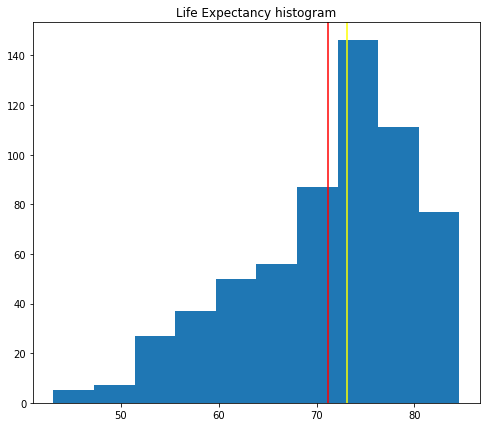

In [22]:
x =  lf_exp_Value_np_arr.astype(np.float64)
fig = plt.figure(figsize =(8, 7))
plt.hist(x, bins = 10)

plt.title("Life Expectancy histogram")
plt.axvline(x=avg_lf_exp,color='red') #Mean
plt.axvline(x=median_lf_exp,color='yellow') #Median
# show plot
plt.show()

In [23]:
print("mean:", avg_lf_exp)
print("Median:", median_lf_exp)

print("The Average life expectancy is about 71 years which is the mean.")
print("")
print("As for the median it depicts a more realistic value without being skewed by a small proportion of extremely large or small values.\nAnd therefore provides a better representation of the life expectancy median of 73 Years")

mean: 71.18275290215588
Median: 73.1
The Average life expectancy is about 71 years which is the mean.

As for the median it depicts a more realistic value without being skewed by a small proportion of extremely large or small values.
And therefore provides a better representation of the life expectancy median of 73 Years


# Question 4

In [24]:
rslt_df['Value'].describe()

count    603.000000
mean      71.182753
std        8.553886
min       43.100000
25%       66.050000
50%       73.100000
75%       77.700000
max       84.600000
Name: Value, dtype: float64

In [25]:
print(f"The range of data is: {rslt_df['Value'].describe()[3]} to {rslt_df['Value'].describe()[7]}")

The range of data is: 43.1 to 84.6


In [26]:
print(f"The first quartile range of data is: {rslt_df['Value'].describe()[4]}")

The first quartile range of data is: 66.05


In [27]:
print(f"The third quartile range of data is: {rslt_df['Value'].describe()[6]}")


The third quartile range of data is: 77.7


In [28]:

std_plus_m = rslt_df['Value'].describe()[2]+rslt_df['Value'].describe()[1]
print(f"The standard deviation + Mean of data is:", std_plus_m)
# print(f"The standard deviation + Mean of data is: {rslt_df['Value'].describe()[2]+rslt_df['Value'].describe()[1]}")


The standard deviation + Mean of data is: 79.7366392204607


In [29]:
std_minus_m = rslt_df['Value'].describe()[1]-rslt_df['Value'].describe()[2]
print(f"The Mean - Standard deviation of data is:", std_minus_m)

The Mean - Standard deviation of data is: 62.628866583851064


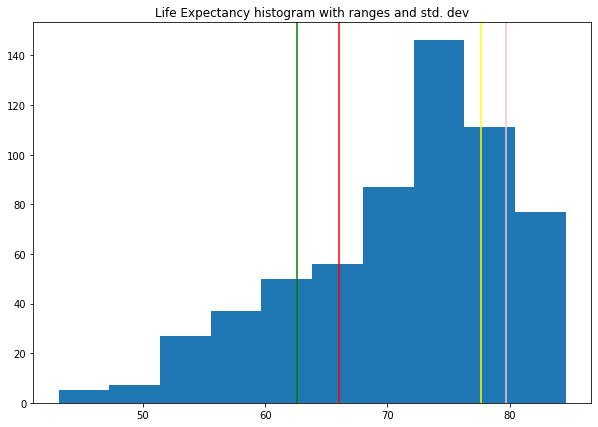

In [30]:
x =  lf_exp_Value_np_arr.astype(np.float64)
fig = plt.figure(figsize =(10, 7))
plt.hist(x, bins = 10)
plt.title("Life Expectancy histogram with ranges and std. dev")
plt.axvline(x=rslt_df['Value'].describe()[4],color='red') #first quartile
plt.axvline(x=rslt_df['Value'].describe()[6],color='yellow') #third quartile
plt.axvline(std_plus_m,color='pink') #standard deviation + Mean
plt.axvline(std_minus_m,color='green') #Mean - Standard deviation

# show plot
plt.show()

#Red = first quartile
#Yellow = third quartile
#Pink = standard deviation + Mean
#Green = Mean - Standard deviation


# Question 5

In [35]:
print('''For a discrete probability distribution, the Poisson distribution is suitable to model the life expectancy. 
This is because the number of events (Living Expectancy for each country) occurring in a fixed interval of time (Years) will occur with a known constant mean rate and independently of the time for example, the previous years of life expectancy for each country.

e.g. Number of countries achieving low and high life expectancy would be an event which could be modelled using Poisson distribution. ''')

For a discrete probability distribution, the Poisson distribution is suitable to model the life expectancy. 
This is because the number of events (Living Expectancy for each country) occurring in a fixed interval of time (Years) will occur with a known constant mean rate and independently of the time for example, the previous years of life expectancy for each country.

e.g. Number of countries achieving low and high life expectancy would be an event which could be modelled using Poisson distribution. 


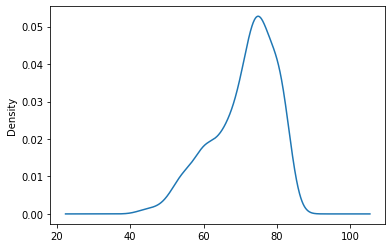

In [31]:
rslt_df['Value'].plot(kind='kde')

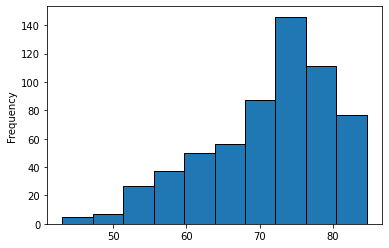

In [32]:
#plot distribution of values in points column using histogram
rslt_df['Value'].plot(kind='hist', edgecolor='black')